In [1]:
##Import all needed libraries
import numpy as np
from sklearn import cluster

from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt
import earthpy.plot as ep
import earthpy.spatial as es

In [2]:
# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

In [3]:
##The dataset is loaded to your GDrive so need to be mounted
# from google.colab import drive
# drive.mount('/content/drive')

Number of bands of the image= 13


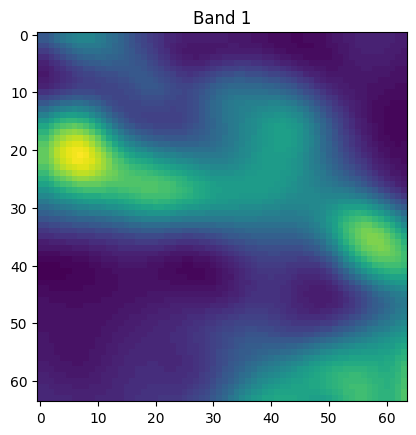

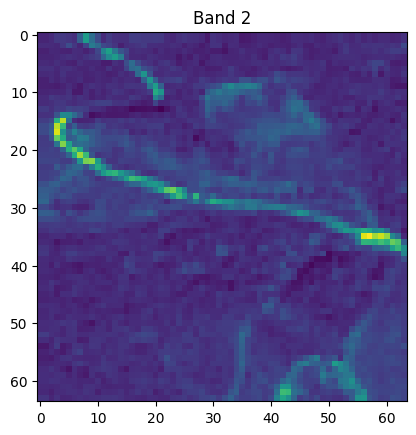

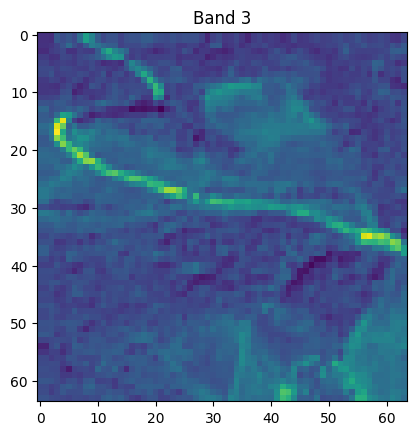

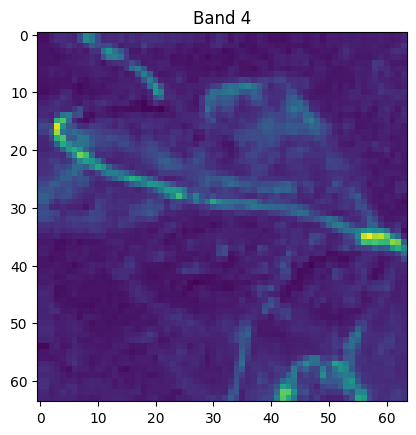

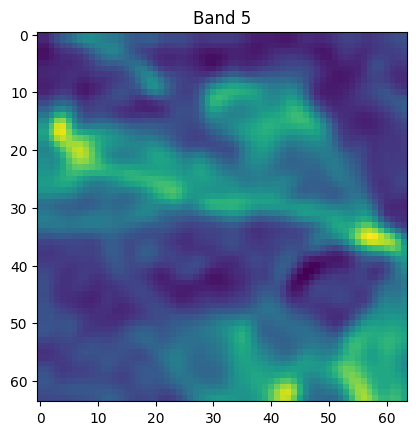

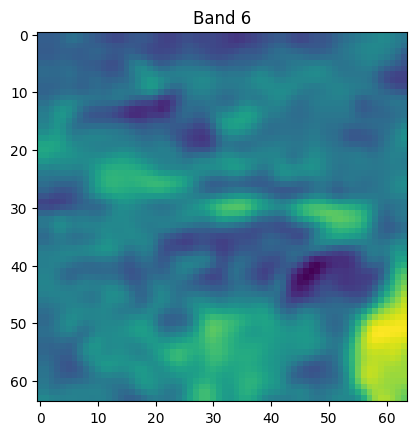

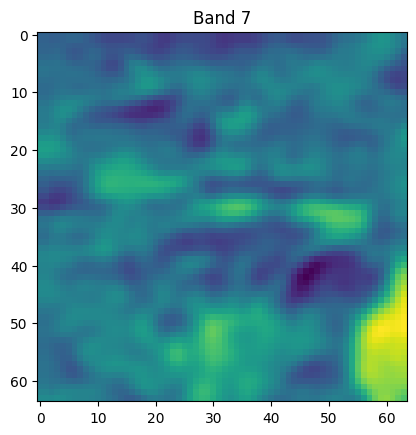

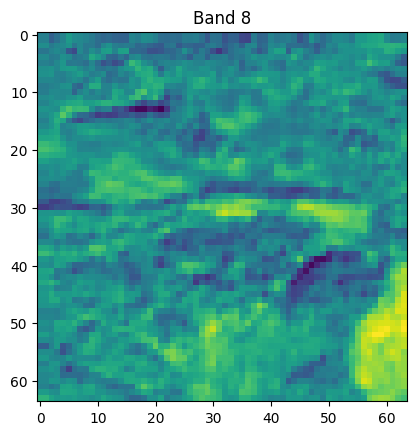

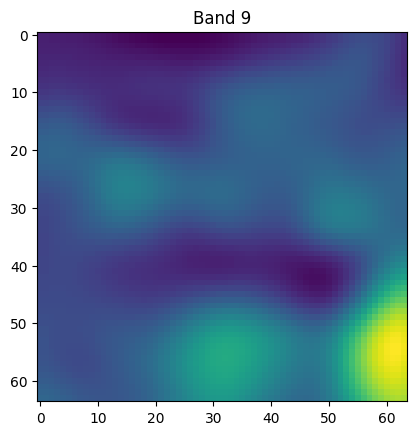

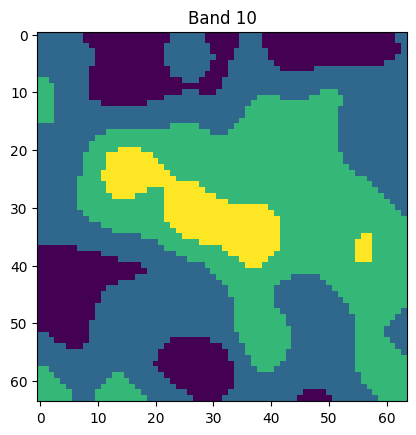

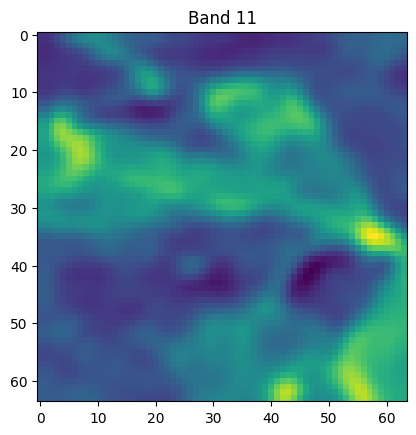

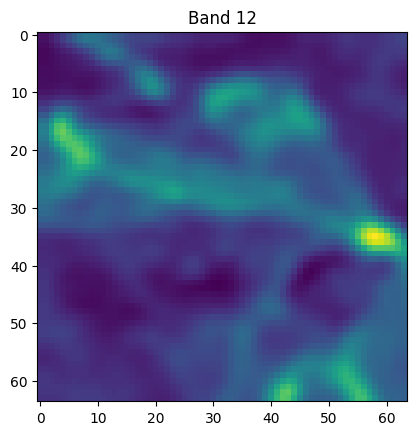

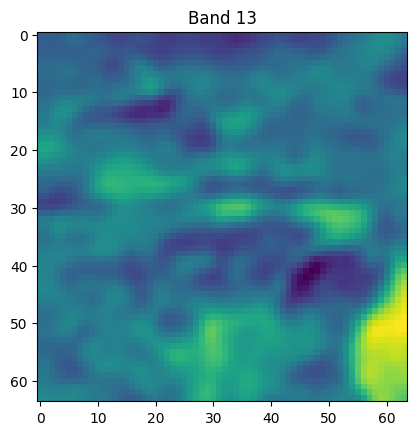

In [4]:
#Read in raster image 
##This line should be updated with the name and path of the image
img_ds = gdal.Open('Forest_27.tif', gdal.GA_ReadOnly)

num_bands=img_ds.RasterCount
print("Number of bands of the image= "+str(num_bands))

##Plot the image band by band i.e: each image is the visualization of a single band
##Note python is zero indexed and bands start from 1
for i in range(1,num_bands+1):
  band = img_ds.GetRasterBand(i)
  img = band.ReadAsArray()
  # Plot the image using Matplotlib
  plt.title("Band "+str(i))
  plt.imshow(img)
  plt.show()
  

In [5]:
##Build an array that contains all the image bands
img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),
               gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))
bands=[]
for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()
    ##Append all bands in one list
    bands.append( img[:, :, b])
      
print (img.shape)

Allbands=np.stack(bands)
print (Allbands.shape)


(64, 64, 13)
(13, 64, 64)


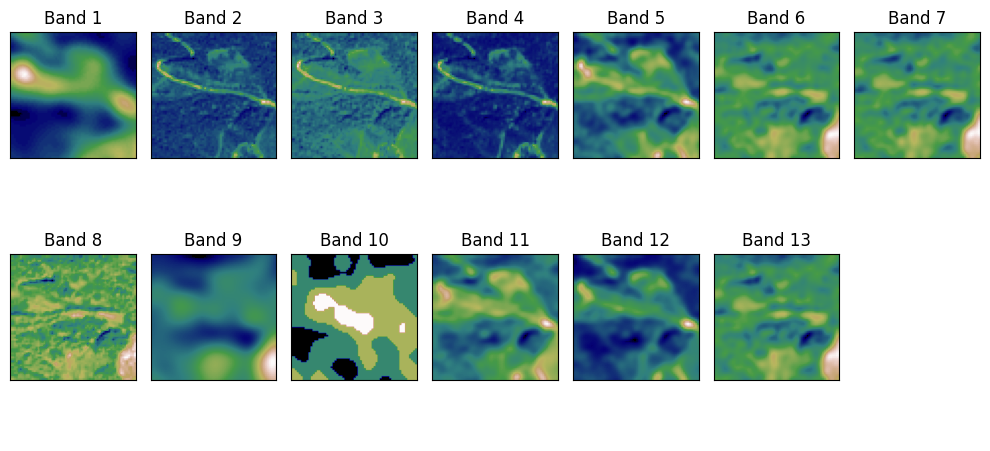

In [6]:
##Visualize all image bands in one plot:

##cmap is the color map used
##Check the available color maps here:
## https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

ep.plot_bands(Allbands, cmap = 'gist_earth', figsize = (10, 5), cols = 7, cbar = False)
plt.show()

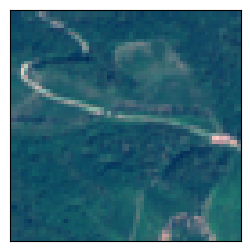

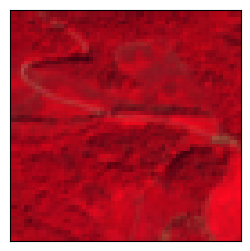

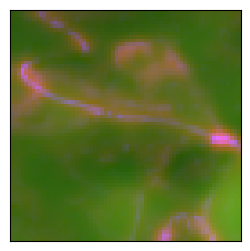

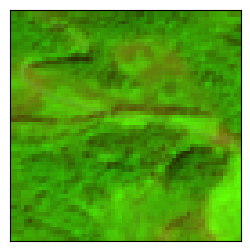

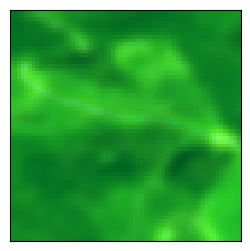

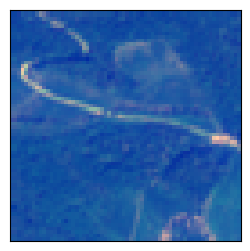

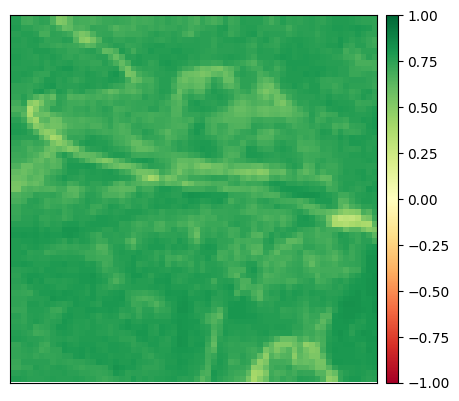

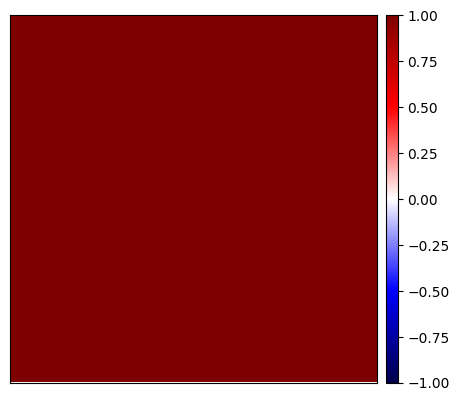

In [7]:
##Visualize the image using multiple bands "composite-band" image:

##Examples using 13 bands of setinel2:

##rgb:
##R is band 4 indexed 3 in the array
##G is band 3 indexed 2 in the array
##B is band 2 indexed 1 in the array
rgb = ep.plot_rgb(Allbands, 
                  rgb=(3,2,1), 
                  figsize=(3, 3))
plt.show()

##Color Infrared (B8, B4, B3):
rgb = ep.plot_rgb(Allbands, 
                  rgb=(7,3,2), 
                  figsize=(3, 3))
plt.show()

##Short-Wave Infrared (B12, B8A, B4):
rgb = ep.plot_rgb(Allbands, 
                  rgb=(11,8,3), 
                  figsize=(3, 3))
plt.show()

##Agriculture (B11, B8, B2):
rgb = ep.plot_rgb(Allbands, 
                  rgb=(10,7,1), 
                  figsize=(3, 3))
plt.show()

##Geology (B12, B11, B2):
rgb = ep.plot_rgb(Allbands, 
                  rgb=(11,10,1), 
                  figsize=(3, 3))
plt.show()

##Bathymetric (B4, B3, B1):
rgb = ep.plot_rgb(Allbands, 
                  rgb=(3,2,0), 
                  figsize=(3, 3))
plt.show()


##Vegetation Index (B8-B4)/(B8+B4):
Vegindx = es.normalized_diff(Allbands[7], Allbands[3])
ep.plot_bands(Vegindx, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(5, 5))
plt.show()

##Moisture Index (B8A-B11)/(B8A+B11)
Moistindx=es.normalized_diff(Allbands[8], Allbands[10])
ep.plot_bands(Moistindx, cmap="seismic", cols=1, vmin=-1, vmax=1, figsize=(5, 5))
plt.show()